<a href="https://colab.research.google.com/github/RiteshopShrivastava/Association_rules/blob/main/Assignment_Association_Rule_my_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset = my_movies**

Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visualize the obtained rules using different plots

In [19]:
!pip install mlxtend

In [20]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [14]:
movies_data = pd.read_csv('my_movies.csv')

In [85]:
movies_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# **EDA**

In [27]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [34]:
movies= movies_data.iloc[:,5:]

In [35]:
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [36]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [37]:
movies[movies.duplicated()]

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0


In [38]:
movies1 = movies.drop_duplicates().reset_index()

In [39]:
movies1

,index,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,0,1,0,1,1,0,1,0,0,0,1
1,1,0,1,0,0,1,0,0,0,1,0
2,2,0,0,1,0,0,1,0,0,0,0
3,3,1,1,0,0,1,0,0,0,0,0
4,6,0,0,0,1,0,0,1,0,0,0
5,7,0,1,0,0,1,0,0,0,0,0
6,9,1,1,0,0,0,0,0,1,0,1


In [45]:
movies2 = movies1.drop(['index'], axis=1)


In [46]:
movies2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0
5,0,1,0,0,1,0,0,0,0,0
6,1,1,0,0,0,0,0,1,0,1


# **Association rule**
**Apriori Algorithm**

# Support = 10 % (0.1) & confidence = 70 % (0.7)

In [49]:
frequent_itemsets = apriori(movies2,min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.428571,(Sixth Sense)
1,0.571429,(Gladiator)
2,0.285714,(LOTR1)
3,0.285714,(Harry Potter1)
4,0.428571,(Patriot)
5,0.285714,(LOTR2)
6,0.142857,(Harry Potter2)
7,0.142857,(LOTR)
8,0.142857,(Braveheart)
9,0.285714,(Green Mile)


In [50]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)

In [51]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
2,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
3,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
4,(Sixth Sense),(Harry Potter1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714
246,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
247,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
248,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


In [53]:
# Lift Ratio > 1 is considered as good association
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
2,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
3,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
4,(Sixth Sense),(Harry Potter1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714
246,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
247,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
248,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


**Inference : 242 rules have good association among antcedent & consequents**

In [61]:
# sorting based on lift ratio & displaying top 20 rules
rules.sort_values('lift', ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
187,"(LOTR2, Green Mile)","(Sixth Sense, LOTR1)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf
225,"(Sixth Sense, LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf
215,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf
213,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf
168,"(Sixth Sense, LOTR1)","(Harry Potter1, Green Mile)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf
...,...,...,...,...,...,...,...,...,...
54,"(Sixth Sense, Green Mile)",(Gladiator),0.285714,0.571429,0.142857,0.500000,0.875000,-0.020408,0.857143
6,(Sixth Sense),(Patriot),0.428571,0.428571,0.142857,0.333333,0.777778,-0.040816,0.857143
7,(Patriot),(Sixth Sense),0.428571,0.428571,0.142857,0.333333,0.777778,-0.040816,0.857143
44,(Sixth Sense),"(Gladiator, Patriot)",0.428571,0.428571,0.142857,0.333333,0.777778,-0.040816,0.857143


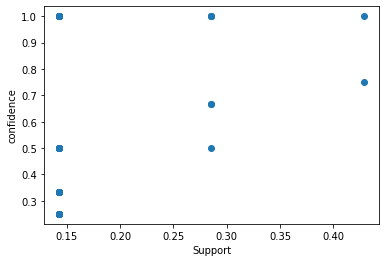

In [59]:
# Scatter plot to visualize rules
import matplotlib.pyplot as plt
plt.scatter(rules.support, rules.confidence)
plt.xlabel('Support')
plt.ylabel('confidence')
plt.show()

# **Association Rule**
# Support = 5 % (0.05) & Confidence = 80 % (0.8)

In [137]:
frequent_itemsets1= apriori( movies2, min_support=0.05, use_colnames= True)
frequent_itemsets1

,support,itemsets
0,0.428571,(Sixth Sense)
1,0.571429,(Gladiator)
2,0.285714,(LOTR1)
3,0.285714,(Harry Potter1)
4,0.428571,(Patriot)
5,0.285714,(LOTR2)
6,0.142857,(Harry Potter2)
7,0.142857,(LOTR)
8,0.142857,(Braveheart)
9,0.285714,(Green Mile)


In [138]:
rules1 = association_rules( frequent_itemsets1, metric='lift', min_threshold=0.8)

In [139]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
2,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
3,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
4,(Sixth Sense),(Harry Potter1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
...,...,...,...,...,...,...,...,...,...
241,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714
242,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
243,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
244,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


**Total 246 rules, for support=0.05 & confidence=0.8**

In [140]:
rules1[rules1.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
2,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
3,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857
4,(Sixth Sense),(Harry Potter1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
...,...,...,...,...,...,...,...,...,...
241,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714
242,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
243,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
244,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


**Inference : 242 rules have good association among antcedent & consequents**

In [141]:
rules1.sort_values('lift', ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
208,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf
103,"(Gladiator, Green Mile)",(LOTR),0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf
133,"(Gladiator, Sixth Sense, Green Mile)",(LOTR),0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf
209,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf
165,"(Sixth Sense, Harry Potter1)","(LOTR1, Green Mile)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf
...,...,...,...,...,...,...,...,...,...
41,(Patriot),"(Gladiator, Sixth Sense)",0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429
18,(Gladiator),(Green Mile),0.571429,0.285714,0.142857,0.250000,0.875000,-0.020408,0.952381
51,(Gladiator),"(Sixth Sense, Green Mile)",0.571429,0.285714,0.142857,0.250000,0.875000,-0.020408,0.952381
50,"(Sixth Sense, Green Mile)",(Gladiator),0.285714,0.571429,0.142857,0.500000,0.875000,-0.020408,0.857143


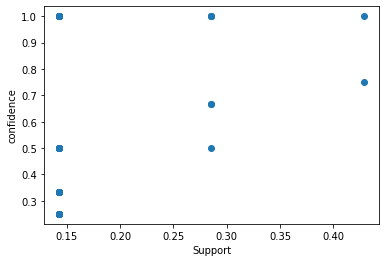

In [142]:
# Scatter plot to visualize rules
plt.scatter(rules1.support, rules1.confidence)
plt.xlabel('Support')
plt.ylabel('confidence')
plt.show()

# **Association Rule**
# Support = 15% and confidence = 90%

In [143]:
frequent_itemsets2 = apriori(movies2, min_support=0.15, use_colnames= True)

In [144]:
frequent_itemsets2

,support,itemsets
0,0.428571,(Sixth Sense)
1,0.571429,(Gladiator)
2,0.285714,(LOTR1)
3,0.285714,(Harry Potter1)
4,0.428571,(Patriot)
5,0.285714,(LOTR2)
6,0.285714,(Green Mile)
7,0.285714,"(Gladiator, Sixth Sense)"
8,0.285714,"(Sixth Sense, Green Mile)"
9,0.428571,"(Gladiator, Patriot)"


In [145]:
rules2 = association_rules( frequent_itemsets2, metric='lift', min_threshold=0.9)

In [146]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
2,(Sixth Sense),(Green Mile),0.428571,0.285714,0.285714,0.666667,2.333333,0.163265,2.142857
3,(Green Mile),(Sixth Sense),0.285714,0.428571,0.285714,1.000000,2.333333,0.163265,inf
4,(Gladiator),(Patriot),0.571429,0.428571,0.428571,0.750000,1.750000,0.183673,2.285714
5,(Patriot),(Gladiator),0.428571,0.571429,0.428571,1.000000,1.750000,0.183673,inf
6,(LOTR1),(LOTR2),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
7,(LOTR2),(LOTR1),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf


In [147]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
2,(Sixth Sense),(Green Mile),0.428571,0.285714,0.285714,0.666667,2.333333,0.163265,2.142857
3,(Green Mile),(Sixth Sense),0.285714,0.428571,0.285714,1.000000,2.333333,0.163265,inf
4,(Gladiator),(Patriot),0.571429,0.428571,0.428571,0.750000,1.750000,0.183673,2.285714
5,(Patriot),(Gladiator),0.428571,0.571429,0.428571,1.000000,1.750000,0.183673,inf
6,(LOTR1),(LOTR2),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
7,(LOTR2),(LOTR1),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf


In [148]:
rules2.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(LOTR1),(LOTR2),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
7,(LOTR2),(LOTR1),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
2,(Sixth Sense),(Green Mile),0.428571,0.285714,0.285714,0.666667,2.333333,0.163265,2.142857
3,(Green Mile),(Sixth Sense),0.285714,0.428571,0.285714,1.000000,2.333333,0.163265,inf
4,(Gladiator),(Patriot),0.571429,0.428571,0.428571,0.750000,1.750000,0.183673,2.285714
5,(Patriot),(Gladiator),0.428571,0.571429,0.428571,1.000000,1.750000,0.183673,inf
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714


**Inference : All the 8 rules have good association among antecedent & consequents**

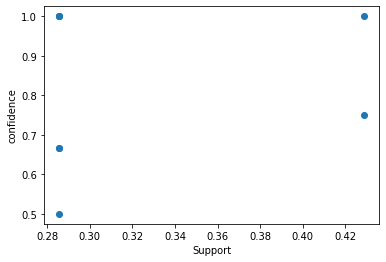

In [149]:
# Scatter plot to visualize rules
plt.scatter(rules2.support, rules2.confidence)
plt.xlabel('Support')
plt.ylabel('confidence')
plt.show()